In [1]:
"""
① (10점) 주어진 5개의 data set (Am241_countrate.csv, Ba133_countrate.csv , Cs137_countrate.csv, 
Eu152_countrate.csv , Background_countrate.csv 을 각각 읽어 들이시오.
- 각 file 첫번째 열(column) 은 ADC Channel 번호, 두번째 열 은 count rate (#/s)
"""
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

colnames = ['ADC Channel Number', 'count rate (#/s)']
Am241 = pd.read_csv('기말프로젝트_압축/Am241_countrate.csv', names = colnames, header=None)
Ba133 = pd.read_csv('기말프로젝트_압축/Ba133_countrate.csv',names = colnames, header=None)
Cs137=pd.read_csv('기말프로젝트_압축/Cs137_countrate.csv',names = colnames, header=None)
Eu152=pd.read_csv('기말프로젝트_압축/Eu152_countrate.csv',names = colnames, header=None)
Background = pd.read_csv('기말프로젝트_압축/Background_countrate.csv',names = colnames, header=None)

In [2]:
"""
② (10점) 이제 각각의 file에서 자료 count rate의 불확실성 (uncertainty)를 구하려 한다. 검출기의
count가 Poisson 분포를 따른다고 가정하고 count rate 의 불확실성을 구한 후 읽어 들인 5개
의 dataset의 3번째 열에 계산 값을 추가하시오.

"""

Am241['uncertainties']=np.sqrt(Am241['count rate (#/s)']*3600)/3600
Ba133['uncertainties']=np.sqrt(Ba133['count rate (#/s)']*28252)/28252
Cs137['uncertainties']=np.sqrt(Cs137['count rate (#/s)']*22880)/22880
Eu152['uncertainties']=np.sqrt(Eu152['count rate (#/s)']*23352)/23352
Background['uncertainties']=np.sqrt(Background['count rate (#/s)']*4328)/4328

In [3]:
""""3_1_Linear Least Square Fit_Spring.ipynb"③ (10점) 방사선원을 사용하여 획득한 4개 자료의 2번째 열에 기록된 값은 방사선원과 배경의
영향이 혼합되어 있다고 추정된다 (𝑪𝒊𝒔𝒐𝒕𝒐𝒑𝒆 + 𝒃𝒂𝒄𝒌𝒈𝒐𝒓𝒖𝒏𝒅). 4개 자료의 2번째 열에서 background 
coutrate 을 (𝑪𝒃𝒂𝒄𝒌𝒈𝒓𝒐𝒖𝒏𝒅) 제거하여 4번째 column에 삽입하라
"""

Am241['count rate wo background (#/s)'] = Am241['count rate (#/s)']- Background['count rate (#/s)']
isotopes = [Ba133, Cs137, Eu152]
for i in isotopes:
    bccount1 = i['count rate (#/s)'][(i['ADC Channel Number']<255)]- Background['count rate (#/s)']
    bccount2 = i['count rate (#/s)'][(i['ADC Channel Number']>=255)]
    i['count rate wo background (#/s)']= pd.concat([bccount1, bccount2])

In [4]:
    """
    ④ (10 점 5 번째 열에 는 4 번째 열값의 불 확실성 을 계산하라 . 5 번째 열의 불확실성은 아래의 관계
식을 참조하여 Error Propagation 공식을 따라 계산하면 된다
𝐶𝑛𝑒𝑡= 𝐶 𝑖𝑠𝑜𝑡𝑜𝑝𝑒 + 𝑏𝑎𝑐𝑘𝑔𝑜𝑟𝑢𝑛𝑑 − 𝐶𝑏𝑎𝑐𝑘𝑔𝑟𝑜𝑢𝑛𝑑
    """
    
Am241['uncertainties for net'] = Am241['uncertainties'] + Background['uncertainties']
for i in isotopes:
        bcuncertainties1 = i['uncertainties'][(i['ADC Channel Number']<255)] + Background['uncertainties']
        bcuncertainties2 = i['uncertainties'][(i['ADC Channel Number']>=255)]
        i['uncertainties for net'] = pd.concat([bcuncertainties1, bcuncertainties2])

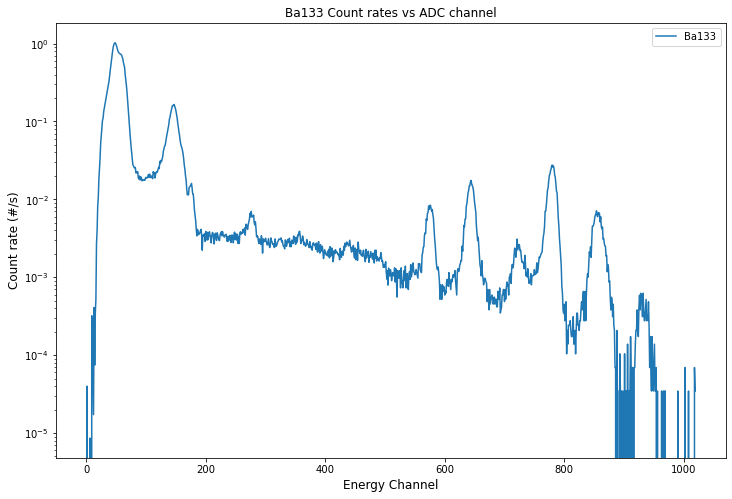

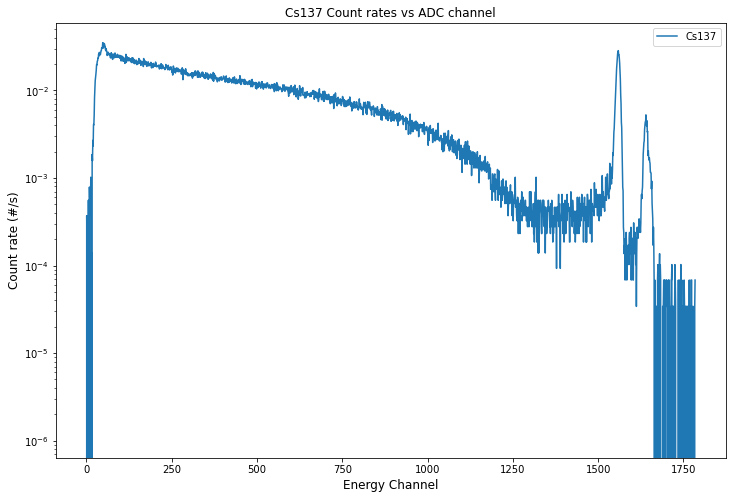

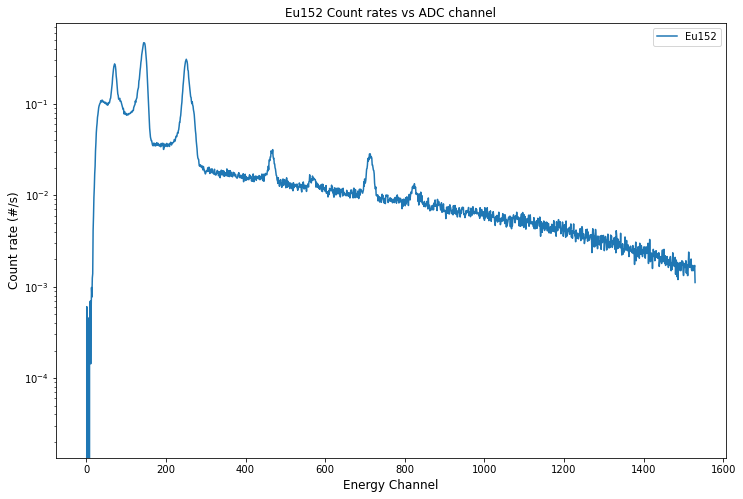

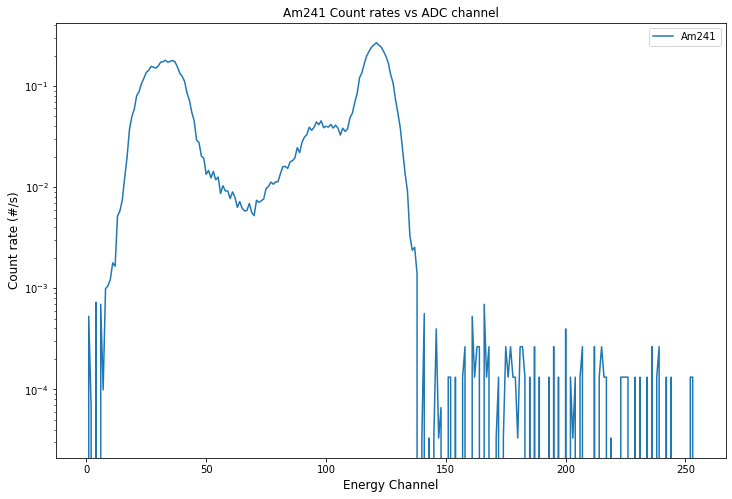

In [5]:
"""
    ⑤ 1 0 점 이제 3 에서 계산한 4 번 째 열의 값이 방사선원에 대한 장치의 순수 반응으로 간주 하자
4 개의 방사선원에 대한 count rate 값 (4 번째 열 값 의 그림을 각각 그리시오
페이지 4 / 6
- 그림의 X 축 은 A DC Channel 번호 Y 축 count rate 으로 설정하여 그릴 것
"""
isonames = ['Ba133', 'Cs137', 'Eu152','Am241']
isotopes.append(Am241)
for i in range(len(isonames)):
    fontsize=12
    plt.figure(figsize=(12,8))
    plt.yscale('log')
    plt.plot(isotopes[i]['ADC Channel Number'], isotopes[i]['count rate wo background (#/s)'], label = isonames[i])
    plt.title(f'{isonames[i]} Count rates vs ADC channel', fontsize = fontsize)
    plt.ylabel('Count rate (#/s)', fontsize = fontsize); plt.xlabel('Energy Channel', fontsize=fontsize)
    plt.legend()
    plt.show()


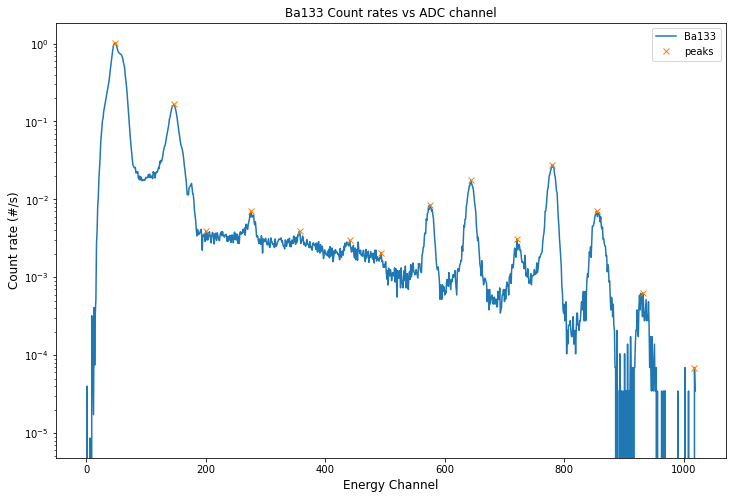

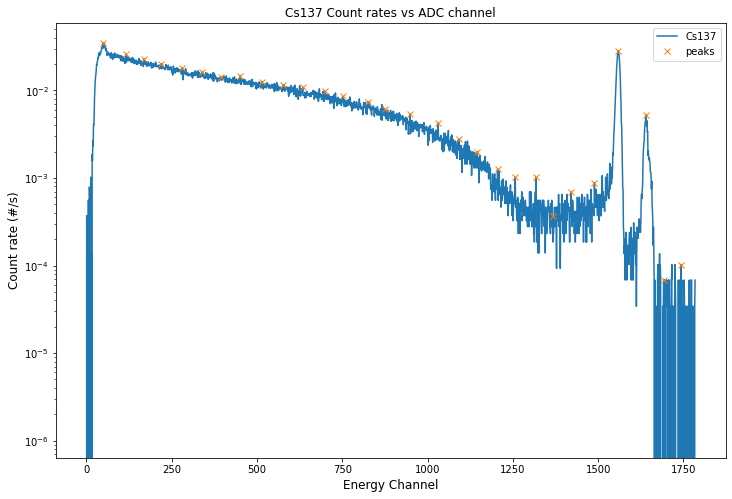

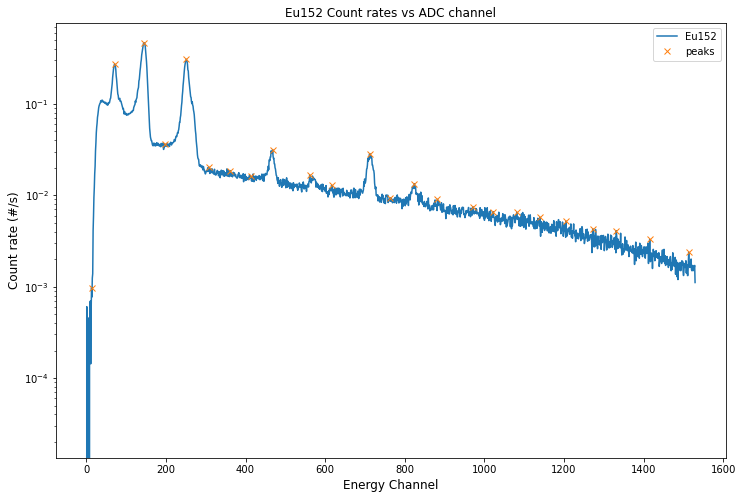

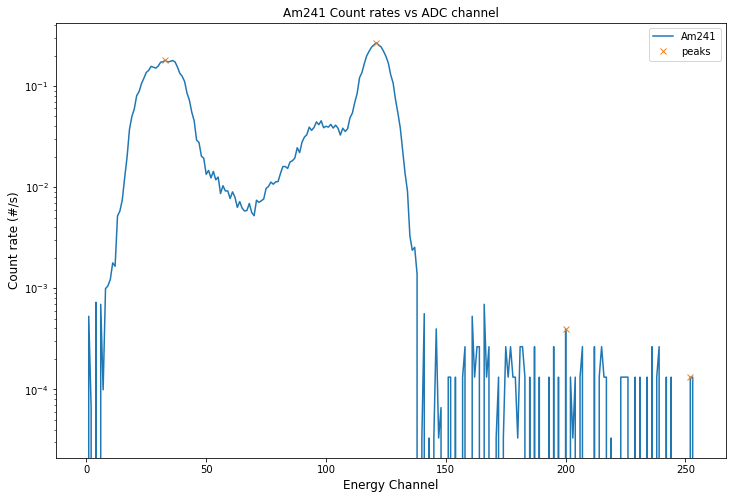

In [6]:
    """
    ⑥ 1 0 점 이 그림에서 발견되는 눈에 띄는 선명한 Peak 들을 python function 을 이용 하여 찾고
Peak 의 X 값 (ADC channel) 을 그림에 표시 하시오
※
f rom scipy.signal import find_peaks ” 구문을 통해 fin d_peaks 등을 호출하면 해당 기능
을 code 상에서 수행할 수 있다
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.ht
ml
https://plotly.com/python/peak
finding/
    """
    

from scipy.signal import find_peaks

peak_arr = []
for i in range(len(isonames)):
        peaks, _ = find_peaks(isotopes[i]['count rate wo background (#/s)'], distance=50)
        peak_arr.append(peaks)
        fontsize=12
        plt.figure(figsize=(12,8))
        plt.yscale('log')
        plt.plot(isotopes[i]['ADC Channel Number'], isotopes[i]['count rate wo background (#/s)'], label = isonames[i])
        plt.plot(peaks, isotopes[i]['count rate wo background (#/s)'][peaks], "x", label='peaks')
        plt.title(f'{isonames[i]} Count rates vs ADC channel', fontsize = fontsize)
        plt.ylabel('Count rate (#/s)', fontsize = fontsize); plt.xlabel('Energy Channel', fontsize=fontsize)
        plt.legend()
        plt.show()

In [7]:
"""
⑦ 1 0 점 자료에 존재하는 Peak 중 에너지가 잘 알려진 P eak 들 중 일부를 선정하 여 Energy
Channel 의 관계식 에 사용하려 한다 아래의 그림과 같이 15 개의 peak 을 이용하려 하니 이들
peak 의 ADC channel 값 을 찾아 numpy array 로 저장하시오
"""

#peak_arr에서 각 isotopes의 원하는 peak index
peak_arr_Ba133 = [0,1,7,8,10,11]
peak_arr_Cs137 = [-4,-3]
peak_arr_Eu152 = [1,2,4,8,11,13]
peak_arr_Am241 = [1]
peak_arr_Ba133 = np.array(peak_arr[0][peak_arr_Ba133])
peak_arr_Cs137=np.array(peak_arr[1][peak_arr_Cs137])
peak_arr_Eu152=np.array(peak_arr[2][peak_arr_Eu152])
peak_arr_Am241=np.array(peak_arr[3][peak_arr_Am241])

peaks = np.array([])
peaks = np.append(peaks, peak_arr_Am241)
peaks = np.append(peaks, peak_arr_Ba133)
peaks = np.append(peaks, peak_arr_Cs137)
peaks = np.append(peaks, peak_arr_Eu152)


In [8]:
    """
    ⑧ 1 0 점 아래의 표를 참조하여 ⑦ 에 서 구한 array 에 대응하는 별도의 array 로 저장하시오
Energy array)
    """
    
energy_sample = np.array([59.5, 30.9, 79.0, 240.0,267,320,350.3, 624.2, 656.7, 40.1, 74.9,114.5, 190.5, 294, 335.9])


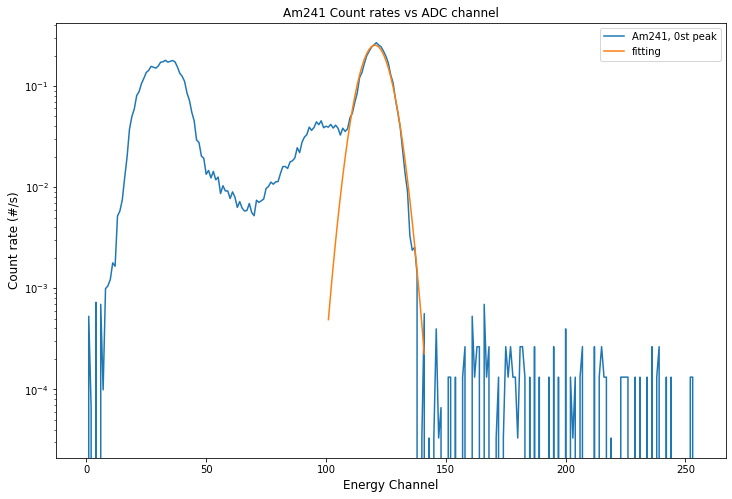

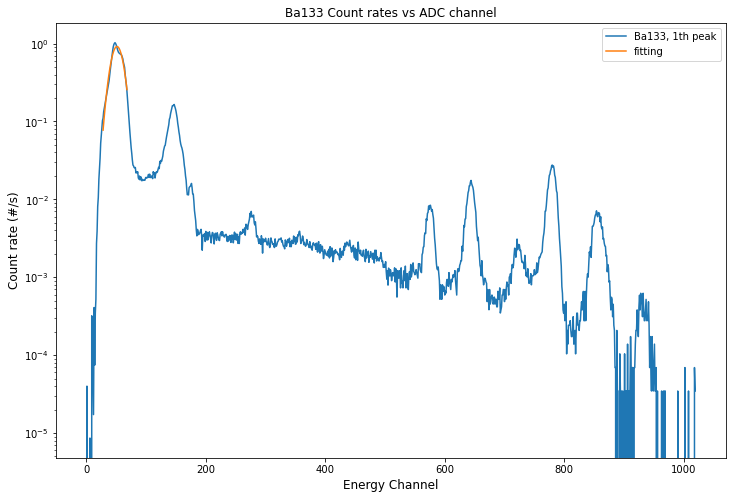

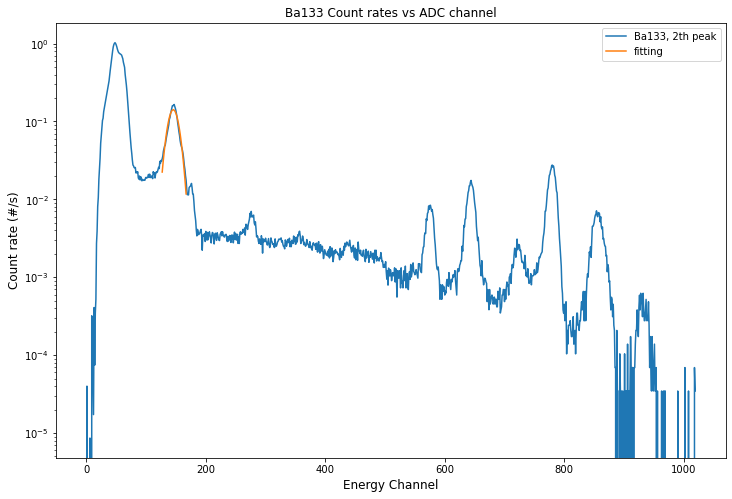

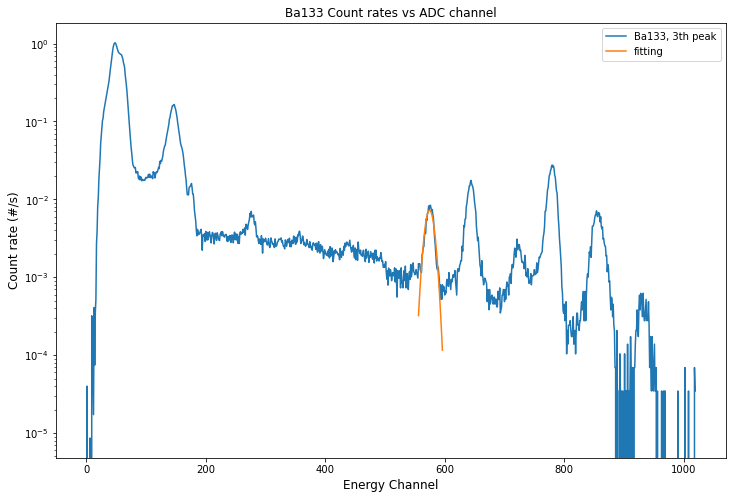

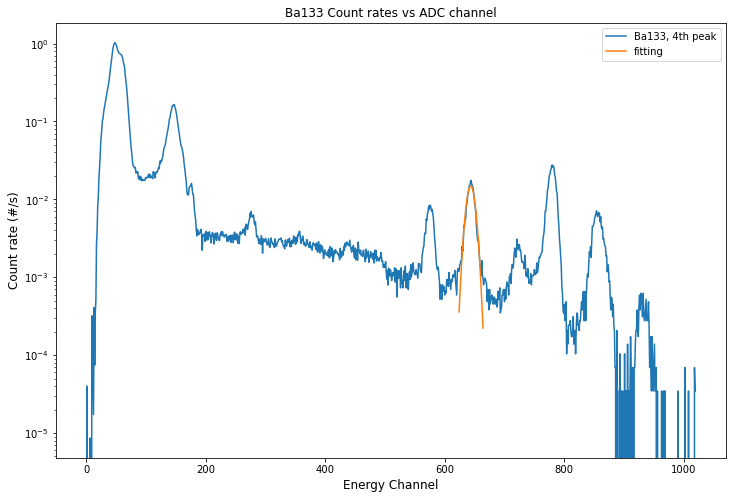

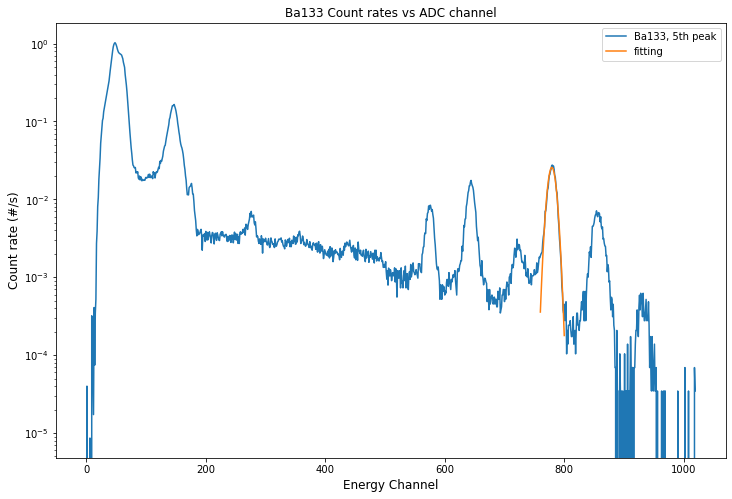

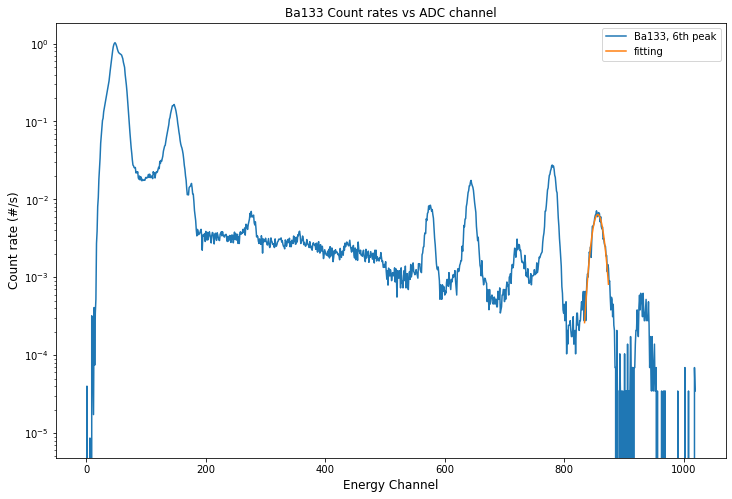

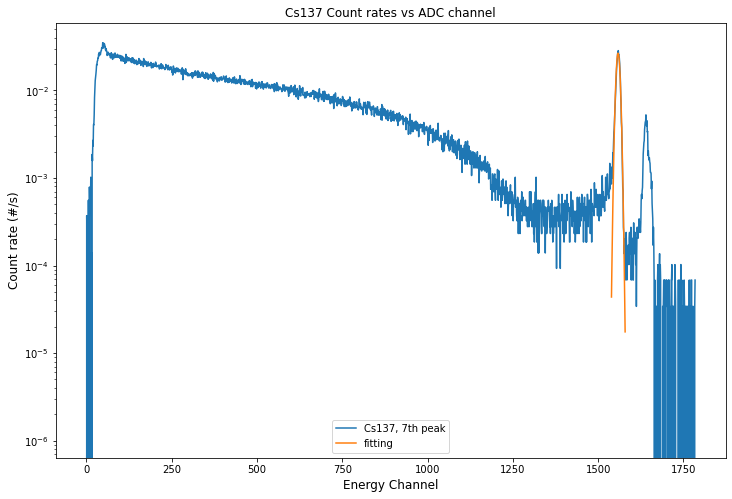

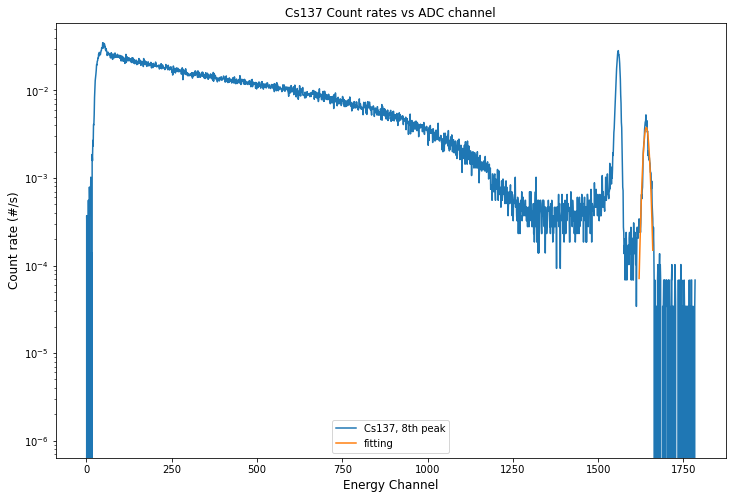

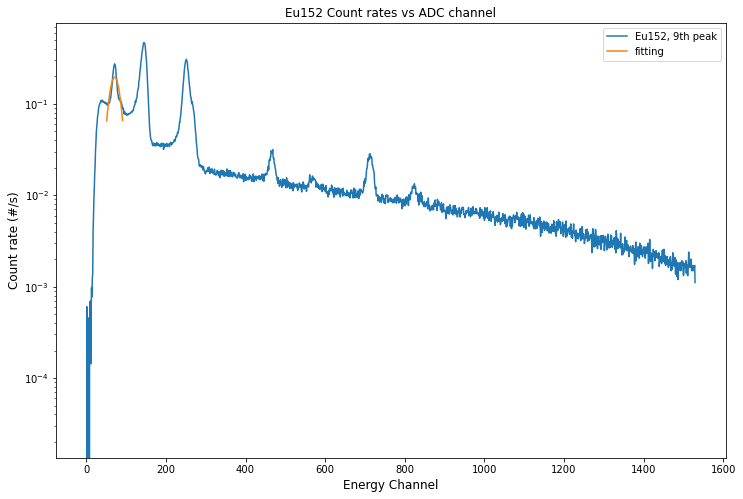

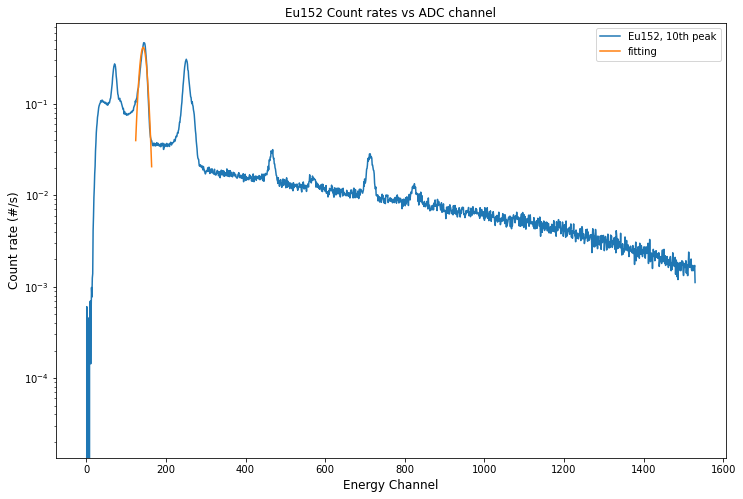

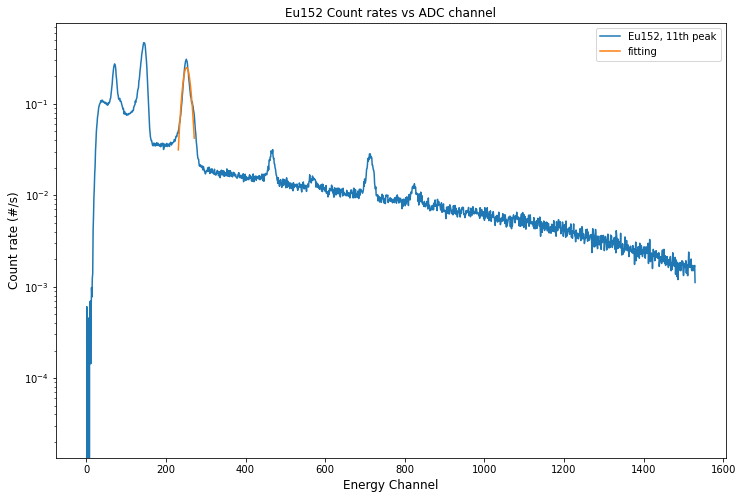

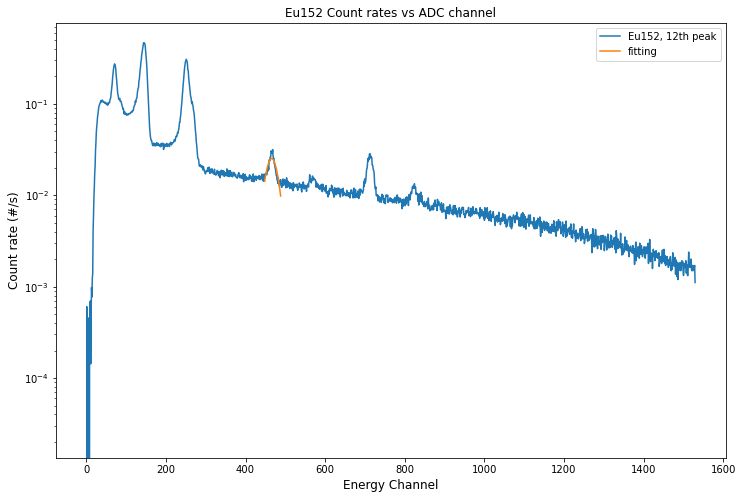

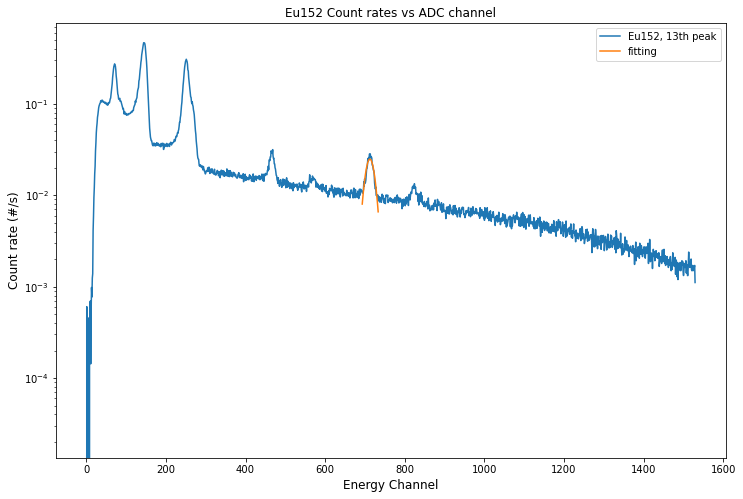

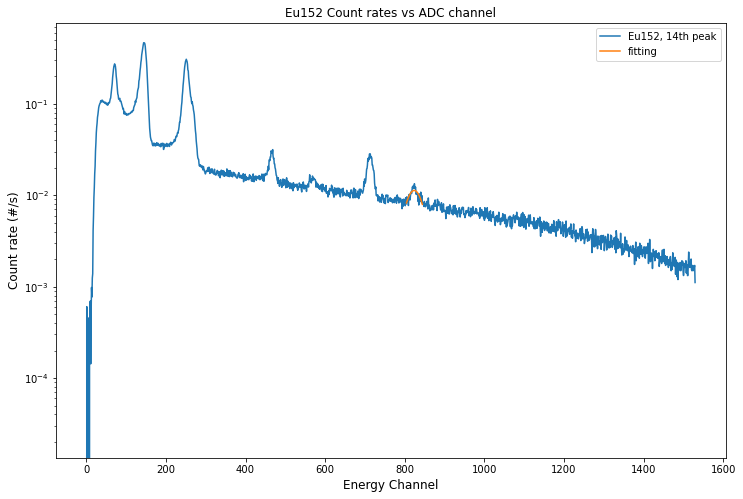

In [9]:
    """
    ⑨ (20 점 ⑦ 에서 찾은 ADC Peak 의 불확실성에 해당하는 값을 찾기 위해 Figure 2 에 나열된 1 5 개
Peak 의 모양을 Gaussian 함수 를 이용하여 Fitting 하려 한다 사용할 함수의 모양은 일반적으로
아래와 같다 여기서 찾고자 하는 Fitting parameter 는 (A, 𝒙𝟎, 𝝈) 이고 각각 A 는 peak 에서의 p
크기 (peak count 𝒙𝟎는 peak 의 x 위치 peak 의 chann el 값 𝝈는 해당 p eak 의 폭을 나
타낸다 Figure 2 의 1 5 개의 peak 각각에 대하여 Gaussian fitting 을 수행하여 최적의 parameter
(A, 𝒙𝟎, 𝝈 를 찾고 그 결과를 그림으로 표시 하시오
𝑓(𝑥)= 𝐴𝑒−(𝑥−𝑥0)2/𝜎2
- F itting 에 사용할 초기값으로 A = peak 에서의 관측 count rate, 𝒙𝟎=peak 의 위치 ⑦ 에서
찾은 값 이용 𝝈=10 을 가정하시오
- 각 P eak 의 Fitting 에 사용할 ADC 의 범위는 닫힌 구간 x o 20, x o +20 을 적용 하시오
    """
    
from scipy.optimize import curve_fit    
    def func(x, A, x0, sig):
        return A*np.exp(-(x-x0)**2/(sig**2))

isotopes = [Am241, Ba133, Cs137, Eu152]
isonames = ['Am241', 'Ba133', 'Cs137', 'Eu152']
popts = []
pcovs = []
# 파라메터 지정 함수
def curveparam(isotope, x0):
        yval = isotope.loc[(isotope['ADC Channel Number']>=x0-20) & (isotope['ADC Channel Number']<=x0+20),'count rate wo background (#/s)']
        xval = np.arange(x0-20, x0+21,1)
        p0 = [isotope['count rate wo background (#/s)'][x0], x0, 10]
        sigma = isotope.loc[(isotope['ADC Channel Number']>=x0-20) & (isotope['ADC Channel Number']<=x0+20),'uncertainties for net']
        return xval, yval, p0, sigma
# 파라메터 사용해서 피팅
# i=0일 때 Am241
# i=1~6일 때 Ba133
# i=7~8일 때 Cs137
# i=9~14일 때 Eu152
fontsize=12
for i in range(15):
        if i==0:
            #curveparam 불러오기

            isotope = isotopes[0]
            isoname = isonames[0]
            xval, yval, p0, sigma = curveparam(isotope, peaks[i])
            popt, pcov = curve_fit(func, xval, yval, p0=p0, sigma=sigma)
            popts.append(popt)
            pcovs.append(pcov)
            plt.figure(figsize=(12,8))
            plt.yscale('log')
            plt.plot(isotope['ADC Channel Number'], isotope['count rate wo background (#/s)'], label = f'{isoname}, {i}st peak')
            yarr = func(xval, popts[i][0], popts[i][1], popts[i][2])
            plt.plot(xval, yarr, label='fitting')
            plt.title(f'{isoname} Count rates vs ADC channel', fontsize = fontsize)
            plt.ylabel('Count rate (#/s)', fontsize = fontsize); plt.xlabel('Energy Channel', fontsize=fontsize)
            plt.legend()
            plt.show()
            
            
        elif 0<i<=6:

            isotope = isotopes[1]
            isoname = isonames[1]
            xval, yval, p0, sigma = curveparam(isotope, peaks[i])
            popt, pcov = curve_fit(func, xval, yval, p0=p0, sigma=sigma)
            popts.append(popt)
            pcovs.append(pcov)
            plt.figure(figsize=(12,8))
            plt.yscale('log')
            plt.plot(isotope['ADC Channel Number'], isotope['count rate wo background (#/s)'], label = f'{isoname}, {i}th peak')
            yarr = func(xval, popts[i][0], popts[i][1], popts[i][2])
            plt.plot(xval, yarr, label='fitting')
            plt.title(f'{isoname} Count rates vs ADC channel', fontsize = fontsize)
            plt.ylabel('Count rate (#/s)', fontsize = fontsize); plt.xlabel('Energy Channel', fontsize=fontsize)
            plt.legend()
            plt.show()
        elif 6<i<=8:
            isotope = isotopes[2]
            isoname = isonames[2]
            xval, yval, p0, sigma = curveparam(isotope, peaks[i])
            popt, pcov = curve_fit(func, xval, yval, p0=p0, sigma=sigma)
            popts.append(popt)
            pcovs.append(pcov)
            plt.figure(figsize=(12,8))
            plt.yscale('log')
            plt.plot(isotope['ADC Channel Number'], isotope['count rate wo background (#/s)'], label = f'{isoname}, {i}th peak')
            yarr = func(xval, popts[i][0], popts[i][1], popts[i][2])
            plt.plot(xval, yarr, label='fitting')
            plt.title(f'{isoname} Count rates vs ADC channel', fontsize = fontsize)
            plt.ylabel('Count rate (#/s)', fontsize = fontsize); plt.xlabel('Energy Channel', fontsize=fontsize)
            plt.legend()
            plt.show()
        else:
            isotope = isotopes[3]
            isoname = isonames[3]
            xval, yval, p0, sigma = curveparam(isotope, peaks[i])
            popt, pcov = curve_fit(func, xval, yval, p0=p0, sigma=sigma)
            popts.append(popt)
            pcovs.append(pcov)
            plt.figure(figsize=(12,8))
            plt.yscale('log')
            plt.plot(isotope['ADC Channel Number'], isotope['count rate wo background (#/s)'], label = f'{isoname}, {i}th peak')
            yarr = func(xval, popts[i][0], popts[i][1], popts[i][2])
            plt.plot(xval, yarr, label='fitting')
            plt.title(f'{isoname} Count rates vs ADC channel', fontsize = fontsize)
            plt.ylabel('Count rate (#/s)', fontsize = fontsize); plt.xlabel('Energy Channel', fontsize=fontsize)
            plt.legend()
            plt.show()
            

함수 : y=2.556x(+-0.00808)-38.072(+-2.927)


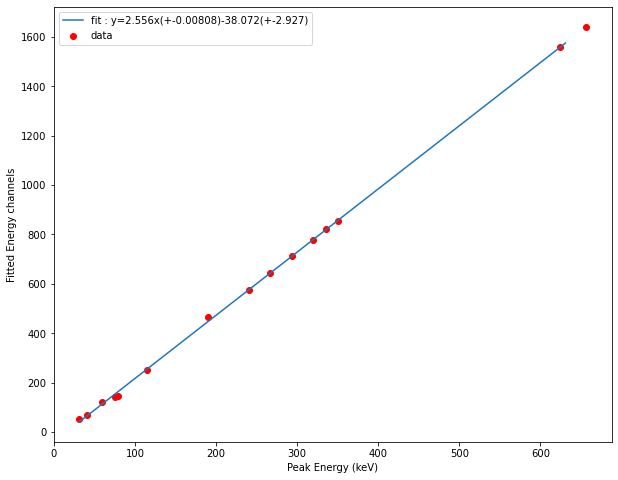

In [10]:
    """
    ⑩ (20 점 ⑨ 에서 찾은 최적의 Fitting Parameter 를 이용하여 Energy 와 Channel 사이의 관계식을
선형으로 표시하려 한다 Linear Least Square Fit 을 통하여 E nergy Channel 관계식을 구하시오
- Table 1 의 Peak Energy 값을 Linear Least Square Fit 의 x 값으로 간주
- ⑨ 에서 찾은 𝒙𝟎와 𝝈를 각각 Linear Least Square Fit 의 y 𝝈𝒚로 간주
    """

# x = energy_sample, y = popts[i][1]
y = []
sig = []
for i in range(15):
        y.append(float("{:.3f}".format(popts[i][1])))
        sig.append(float("{:.3f}".format(popts[i][2])))
        
def func2(x, A, B):
        return A+B*x
popt, pcov = curve_fit(func2,energy_sample, y, sigma=sig)
Aerr = np.sqrt(np.diag(pcov))[0]
Berr = np.sqrt(np.diag(pcov))[1]
print(f'함수 : y={popt[1]:.3f}x(+-{Berr:.3g}){popt[0]:.3f}(+-{Aerr:.3f})')
xarr = np.arange(energy_sample.min(), energy_sample.max(),100)
yarr = func2(xarr, popt[0], popt[1])

plt.figure(figsize=(10,8))
plt.scatter(energy_sample, y, label = 'data', c='r')
plt.plot(xarr, yarr, label = f'fit : y={popt[1]:.3f}x(+-{Berr:.3g}){popt[0]:.3f}(+-{Aerr:.3f})')
plt.xlabel('Peak Energy (keV)')
plt.ylabel('Fitted Energy channels')
plt.legend()

In [11]:
"""
⑪ 15 점 ⑩ 에서 구한 Fitting 결과에 따르는 Fitting constant 의 불확실성은 얼마인가
"""

print(f'답 : B = {Berr:.3g}, A = {Aerr:.3f}')

답 : B = 0.00808, A = 2.927


In [12]:
    """
    ⑫ 15 점 ⑩ 에서 수행한 Fitting 을 이차식에 대하여 수행할 때 이차항의 계 수는 얼마인가 에너
지와 A DC 사이의 관계식은 C orrelation Coefficient 를 통해 정량적으로 판단할 때 선형적인가
    """

def func3(x,a,b,c):
        return a*x**2+b*x+c

popt, pcov = curve_fit(func3, energy_sample, y, sigma=sig)
print(f'2차항 계수는 {popt[0]:.3}')

from scipy import stats
r2 = stats.pearsonr(energy_sample, y)[0]
print(f'correlation coefficient가 {r2}이므로 이는 양의 기울기를 가지도록 선형적이다.')


2차항 계수는 2.55e-05
correlation coefficient가 0.9998672306041347이므로 이는 양의 기울기를 가지도록 선형적이다.
